# 1. Import Libraries and Data

In [1]:
# Import Libraries
import os,sys
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import matplotlib.cm as cm
sb.set() # set the default Seaborn style for graphics

In [2]:
# Read the train CSV Data
path = r'C:\Users\vigne\Documents\NTUsem1\AI6102 ML\Term paper\costa-rican-household-poverty-prediction\train.csv'
train_data = pd.read_csv(path)

# Add aditional feature to be able to split train from test
# train_data["train"] = 1 

# Drop target data
train_target = train_data.Target
#train_data.drop(['Target'],axis=1,inplace=True)

In [3]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Get the data size
print('No. of rows = No. of people = {}'.format(train_data.shape[0]))
print('No. of col = No. of raw features = {}'.format(train_data.shape[1]))

No. of rows = No. of people = 9557
No. of col = No. of raw features = 143


# 2. Data Exploration

## 2a. Basic Data Quality

In [50]:
# Check data basic stats for quick glance
train_data.describe(include="all")

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,train
count,9557,9.557000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9.557000e+03,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9.557000e+03,9557.000000,9557.000000,9557.0
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_ab9d8bfd2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-6.620522e+18,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,-7.085696e+18,0.385895,...,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,-4.825454e+15,1643.774302,3.302292,1.0
std,NaN,4.151389e+18,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,3.892108e+18,0.680779,...,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,2.109226e+17,1741.197050,1.009565,0.0
min,NaN,-9.223372e+18,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,-9.223372e+18,0.000000,1.000000,1.0
25%,NaN,-9.223372e+18,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,-9.223372e+18,0.000000,...,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,3.600000e+01,289.000000,3.000000,1.0
50%,NaN,-9.223372e+18,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,-9.223372e+18,0.000000,...,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,8.100000e+01,961.000000,4.000000,1.0
75%,NaN,4.500000e+04,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,-9.223372e+18,1.000000,...,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,1.322500e+02,2601.000000,4.000000,1.0


In [187]:
# Check the types of feature values for quick glance
print(train_data.dtypes)

Id            object
v2a1         float64
hacdor         int64
rooms          int64
hacapo         int64
              ...   
SQBmeaned    float64
agesq          int64
Target         int64
train          int64
meanedu      float64
Length: 145, dtype: object


In [52]:
# Check if there are string objects for quick glance
all(isinstance(col,str) for col in train_data.columns)

True

## 2b. Check if data is imbalanced

Text(0.5, 1.0, 'No. of people per Target')

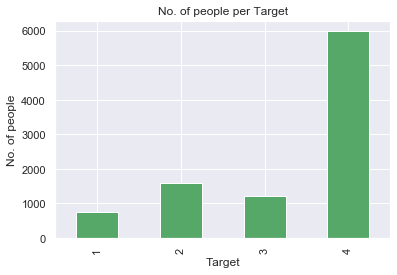

In [139]:
# Number of people per target category in train data
#sb.catplot(y = "Target", data = train_data, kind = "count")
cmap = cm.get_cmap(name='rainbow')
train_data.groupby(['Target'])['Id'].count().plot(kind = "bar", color = 'g')
plt.ylabel("No. of people")
plt.title("No. of people per Target")


Text(0.5, 1.0, 'No. of households per Target')

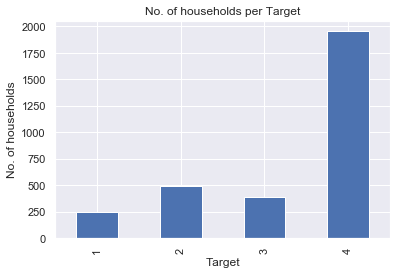

In [117]:
train_data.groupby(['Target'])['idhogar'].nunique().plot.bar()
plt.ylabel("No. of households")
plt.title("No. of households per Target")

In [228]:
train_data.groupby(['Target'])[['idhogar']].nunique()

,idhogar
Target,
1.0,242
2.0,487
3.0,387
4.0,1958


In [249]:
train_data.groupby(['idhogar']).count().shape[0]

2988

In [241]:
train_data.loc[train_data['parentesco1']==1,'Id'].count()

2973

#### Errors present in data!!!!! #################################

With reference to last 3 cells:

1) There are 242+487+387+1958-2988 = 86 households that appear in more than one target group.

2) There are 2988-2973 = 15 households with no head members.

We will ignore these at the moment as there are no other data revealing these mysteries and the compeition requires us to use this data without any external data.

The data is imbalanced and thus balanced weights will be used in the ML models.

## 2c. Distribution of Target labels over a few factors

**1) Gender**

In [5]:
# Get counts
m=train_data[train_data["male"]==1].groupby(["Target"])["male"].count()
f=train_data[train_data["female"]==1].groupby(["Target"])["female"].count()
g=pd.concat([m, f], axis=1)

In [ ]:
m.values

In [44]:
g

,male,female
Target,,
1,326,429
2,741,856
3,577,632
4,2976,3020


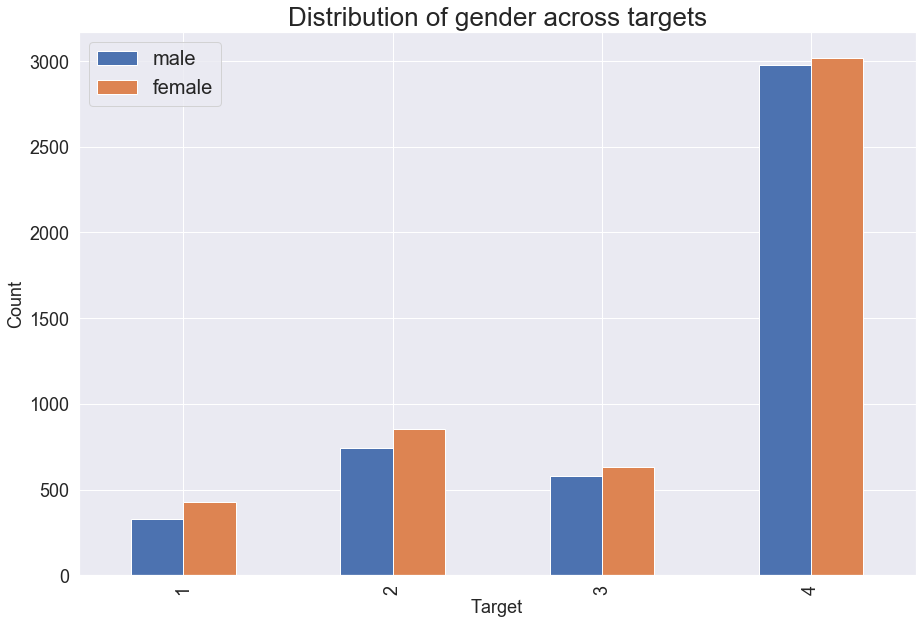

In [6]:
#  Plot
ax = g[['male','female']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18)
ax.set_xlabel("Target", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.legend(["male", "female"], prop={"size":20})
plt.title("Distribution of gender across targets", fontsize=26)
plt.show()

**2) Location - Urban/Rural**

In [8]:
# Get counts
m=train_data[train_data["area1"]==1].groupby(["Target"])["area1"].count()
f=train_data[train_data["area2"]==1].groupby(["Target"])["area2"].count()
g=pd.concat([m, f], axis=1)

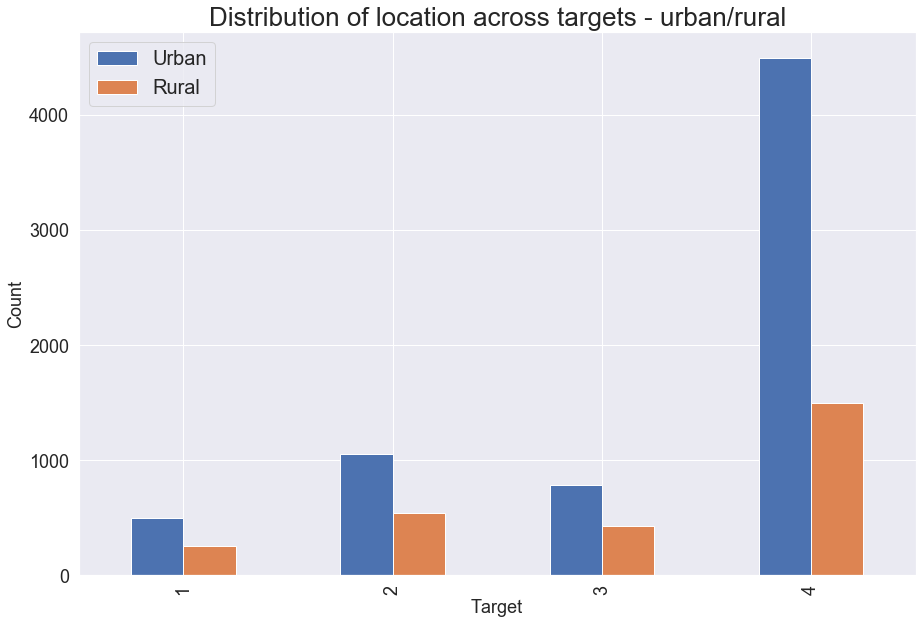

In [9]:
#  Plot
ax = g[['area1','area2']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18)
ax.set_xlabel("Target", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.legend(["Urban", "Rural"], prop={"size":20})
plt.title("Distribution of location across targets - urban/rural", fontsize=26)
plt.show()

**3) Location - Region**

In [10]:
# Get counts
m=train_data[train_data["lugar1"]==1].groupby(["Target"])["lugar1"].count()
f=train_data[train_data["lugar2"]==1].groupby(["Target"])["lugar2"].count()
a=train_data[train_data["lugar3"]==1].groupby(["Target"])["lugar3"].count()
b=train_data[train_data["lugar4"]==1].groupby(["Target"])["lugar4"].count()
c=train_data[train_data["lugar5"]==1].groupby(["Target"])["lugar5"].count()
d=train_data[train_data["lugar6"]==1].groupby(["Target"])["lugar6"].count()
g=pd.concat([m,f,a,b,c,d], axis=1)

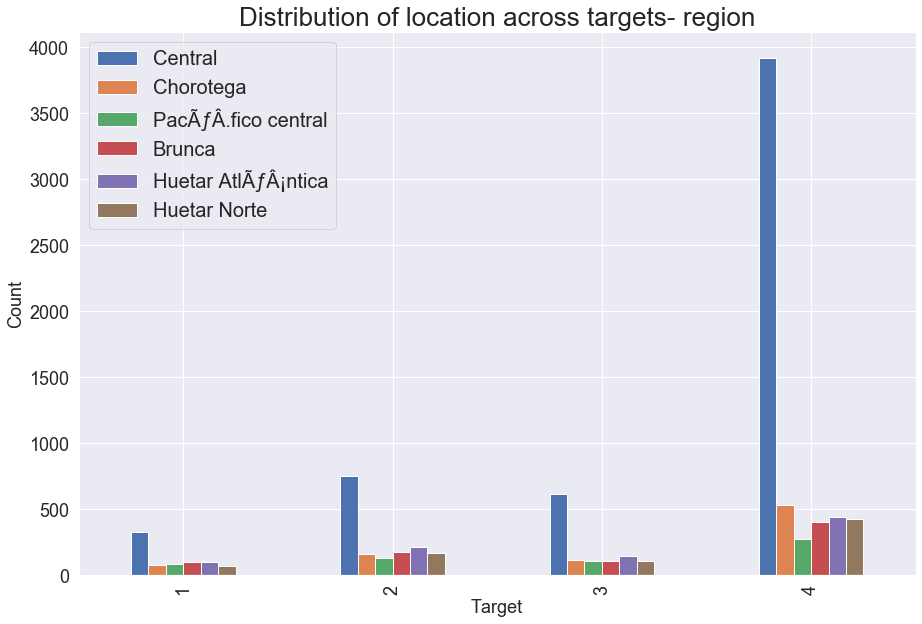

In [11]:
#  Plot
ax = g[['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18)
ax.set_xlabel("Target", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.legend(["Central", "Chorotega","PacÃƒÂ.fico central", "Brunca","Huetar AtlÃƒÂ¡ntica", "Huetar Norte"], prop={"size":20})
plt.title("Distribution of location across targets- region", fontsize=26)
plt.show()

**4) Education**

In [12]:
# Get counts
m=train_data[train_data["instlevel1"]==1].groupby(["Target"])["instlevel1"].count()
f=train_data[train_data["instlevel2"]==1].groupby(["Target"])["instlevel2"].count()
a=train_data[train_data["instlevel3"]==1].groupby(["Target"])["instlevel3"].count()
b=train_data[train_data["instlevel4"]==1].groupby(["Target"])["instlevel4"].count()
c=train_data[train_data["instlevel5"]==1].groupby(["Target"])["instlevel5"].count()
d=train_data[train_data["instlevel6"]==1].groupby(["Target"])["instlevel6"].count()
e=train_data[train_data["instlevel7"]==1].groupby(["Target"])["instlevel7"].count()
k=train_data[train_data["instlevel8"]==1].groupby(["Target"])["instlevel8"].count()
h=train_data[train_data["instlevel9"]==1].groupby(["Target"])["instlevel9"].count()
g=pd.concat([m,f,a,b,c,d,e,k,h], axis=1)

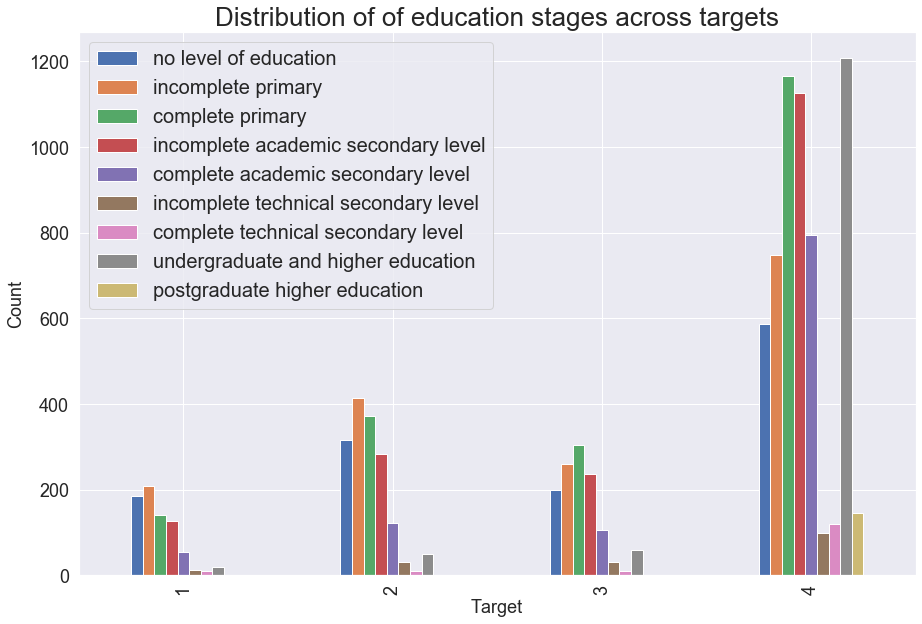

In [13]:
#  Plot
ax = g[['instlevel1','instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18)
ax.set_xlabel("Target", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.legend(["no level of education", "incomplete primary","complete primary", "incomplete academic secondary level","complete academic secondary level", "incomplete technical secondary level", "complete technical secondary level", "undergraduate and higher education", "postgraduate higher education"], prop={"size":20})
plt.title("Distribution of of education stages across targets", fontsize=26)
plt.show()

**5) House type**

In [14]:
# Get counts
m=train_data[train_data["tipovivi1"]==1].groupby(["Target"])["tipovivi1"].count()
f=train_data[train_data["tipovivi2"]==1].groupby(["Target"])["tipovivi2"].count()
a=train_data[train_data["tipovivi3"]==1].groupby(["Target"])["tipovivi3"].count()
b=train_data[train_data["tipovivi4"]==1].groupby(["Target"])["tipovivi4"].count()
c=train_data[train_data["tipovivi5"]==1].groupby(["Target"])["tipovivi5"].count()
g=pd.concat([m,f,a,b,c], axis=1)

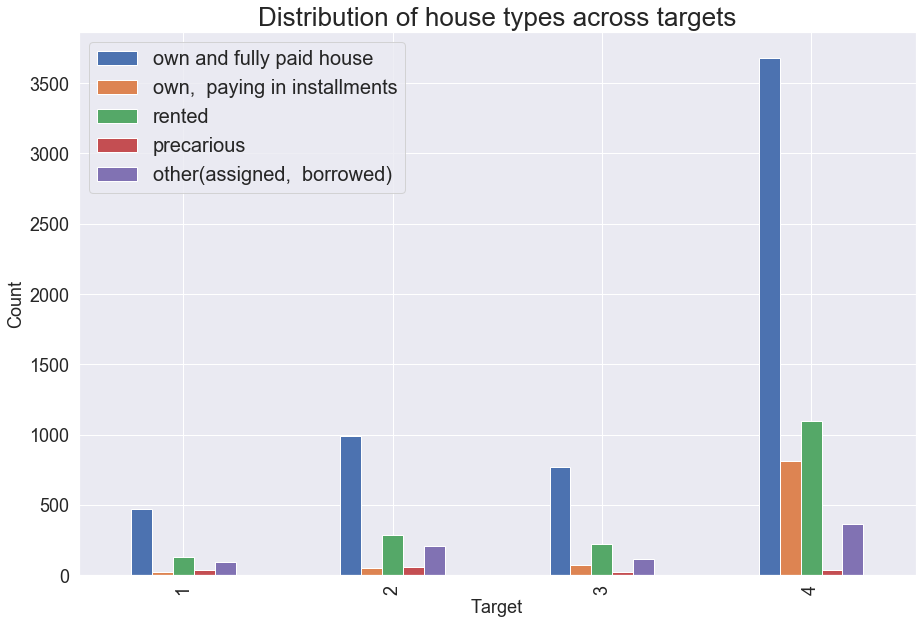

In [15]:
#  Plot
ax = g[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=18)
ax.set_xlabel("Target", fontsize=18)
ax.set_ylabel("Count", fontsize=18)
plt.legend(["own and fully paid house", "own,  paying in installments","rented", "precarious","other(assigned,  borrowed)"], prop={"size":20})
plt.title("Distribution of house types across targets", fontsize=26)
plt.show()

## 2d. Dealing with missing data

In [169]:
# Check columns with nan values and their nan values counts - missing data
def findNanCol(orig_df,print_flag=False):
    df_missing = orig_df.isnull()
    col_list_missing_data = []
    for col in df_missing.columns.values.tolist():
        try:
            x=df_missing[col].value_counts()[1]
            if print_flag:
                print("Column {}: {} missing value counts".format(col,x))
            col_list_missing_data.append(col)
        except:
            continue
    return col_list_missing_data

def fillMissingValues(train_data):
    
    # Fill the nans in v2a1 with 0s as most have paid for their own house and thus no rent payment.
    rain_data['v2a1'].fillna(0)
    
    # Drop v18q1 as this column can be derived with v18q.
    # Furthermore, we will get the avg num of laptops per household member which is a better feature.
    # The new feature will be created in 3rd stage of feature engineering.
    train_data.drop(['v18q1'],axis=1,inplace=True)
    
    # Fill nans in rez_esc with zeros as this feature is meant for age between 7 and 19 as per definition.
    train_data['rez_esc'].fillna(0)
    
    # It turns out that the number of household members 18+ is zero which have givesn the nan value.
    # Therefore, we will convert "meanedu" values to zero.
    train_data['meanedu'] = train_data['meanedu'].fillna(0).astype('float64')
    train_data['SQBmeaned'] = train_data['SQBmeaned'].fillna(0).astype('float64')
    
    return train_data

In [170]:
# List of columns that have missing values and their 
# corresponding number of missing value counts
col_list_missing_data = findNanCol(train_data,print_flag=True)

Column v2a1: 6860 missing value counts
Column v18q1: 7342 missing value counts
Column rez_esc: 7928 missing value counts
Column meaneduc: 5 missing value counts
Column SQBmeaned: 5 missing value counts


#### v2a1

Check correlation for v2a1 (monthly rent payment) with number of rooms, location, having rental/own house and total number of household members.

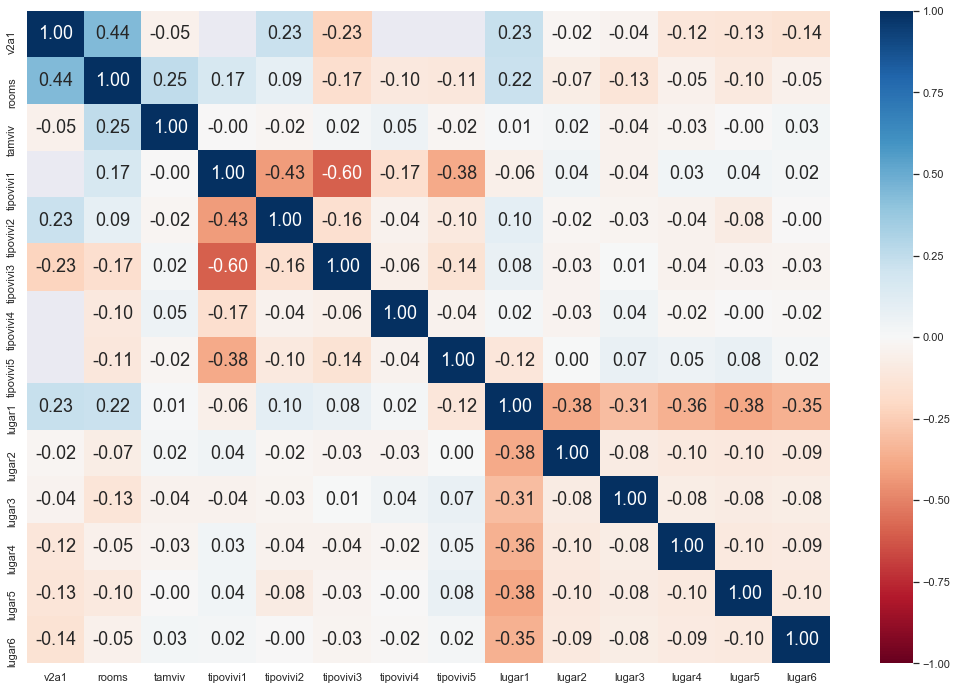

In [206]:
temp_df = train_data[['v2a1','rooms','tamviv','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5','lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']]
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(18, 12))
sb.heatmap(temp_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

By just looking at comparison between v2a1 (monthly rent payment) & other factors namely lugar1(location region Central), rooms(no. of rooms), tipovivi2(own but paying installments) and tipovivi3(rental), there are some trends. The rental payment is moderately positively correlated with number of rooms. It has a weak postiive correlation with location lugar 1 and the house being owned but paying installsments. It has a weak negative correation with house being rented. These relationships do not help to provide a derivation. However, it is possible to have a new feature which is v2a1 per room (monthly rent payment per room).

There are features comparisons like tipoviv1 (own and paid) where the values are missing.

In [216]:
train_data.groupby(['tipovivi1'])[['Id','v2a1']].count()

,Id,v2a1
tipovivi1,,
0.0,3646,2697
1.0,5911,0


Let's take a closer look at v2a1(monthly rental payment) vs tipovivi1(have own house and paid for).
Logically, if one has own house and has fully paid for it, then he does not have to pay rent. 
Meaning his rent is 0.

So with refernce to the table from previous cell, we have 5911 who have already paid for their own house. 
So these 5911 are expected to have values 0 for v2a1. 

However, we have obtained 6860 missing values previously for v2a1. This means 6860-5911 = 949 who have not
no values for both rental payment and tipvovivi1. This is another error in this dataset. 

Neverthelss, we will proceed to fill in with 0s as removing these 949 rows means losing 1/9 of the entire data.
Furthermore, more rows will be removed as the entire household has to be removed if one part of them has been
removed.

Similar to the previous 2 errors mentioned previousy, we will ignore this error and attempt to make the best out
of remaining data.


Fill the nans in v2a1 with 0s.

#### v18q1

Check reltionship between nan values in v18q1 and zero values in v18q.

In [11]:
def checkv18qForZero(train_data):
    return train_data.loc[train_data['v18q1'] == np.nan,'v18q'].sum()

In [16]:
# For v18q1 with nan values, their corresponding v18q values are suspected to be zeros.
# By summing up these corresponding v18q values, we can check for zero.
# If result is zero, all corresponding v18q values are zeros. Else, result will be more than zero.
res = checkv18qForZero(train_data)
print('Sum of corresponding values in v18q for nan values in v18q1 : {}'.format(res))

Sum of corresponding values in v18q for nan values in v18q1 : 0


Fill nans with 0s in v18q1 as the nan values correspond to 0s with v18q1.
Furthermore, we will get the avg num of laptops per household member which is a better feature.
The new feature will be created in 3rd stage of feature engineering.

#### rez_esc

Check correlation for rez_esc (years behind education) with years of schooling, location, age and gender.

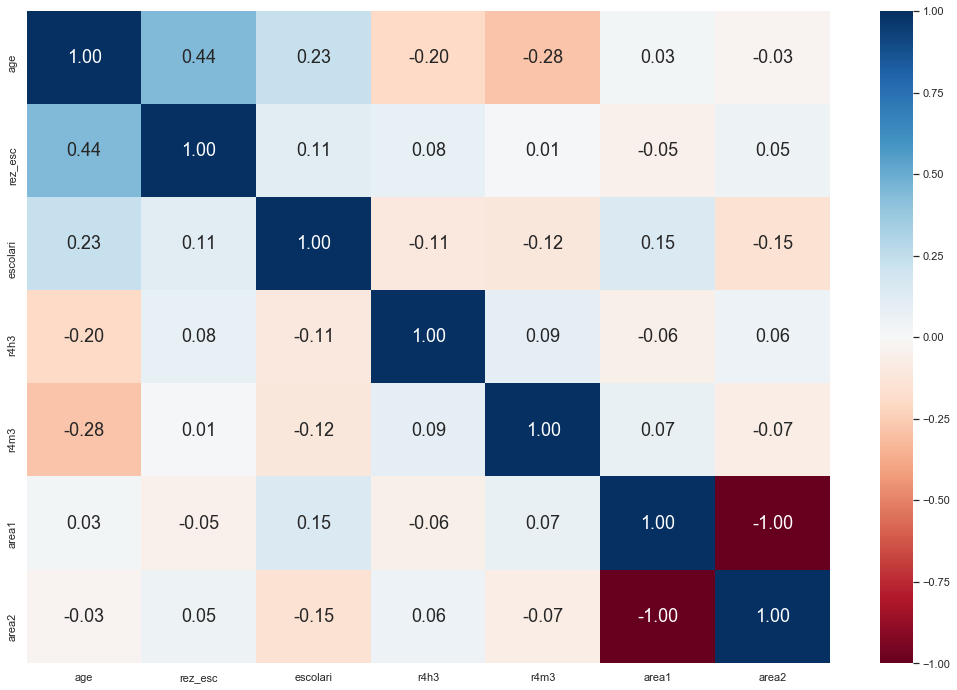

In [197]:
temp_df = train_data[['age','rez_esc','escolari','r4h3','r4m3','area1','area2']]
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(18, 12))
sb.heatmap(temp_df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

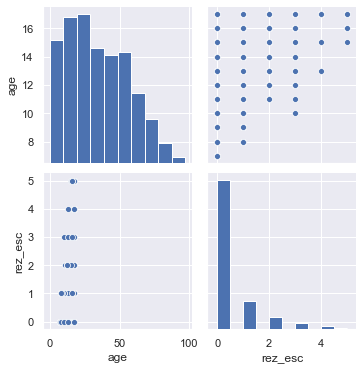

In [205]:
# Draw pairs of variables against one another
temp_df = temp_df = train_data[['age','rez_esc']]
sb.pairplot(data = temp_df)

A positive correlation is observed btween rez_esc (years behind education) and age, it does not help to determine the rez_esc. In fact, it makes sense that the years behind schooloing increases as age increases. A further observation is that the age is limited to around 20 years propably indicating this feautre is applicable to students. As per dicussion post with host, this feature is for age between 7 and 19 which explains the vast number of blanks.

Fill the nans in rez_esc with 0s.

#### meanedu & SQBmeaned

Features "meanedu" & "SQBmeaned" are related to each other. "SQBmeaned" is the square of "meanedu" as per definition given. This explains the same number of missing values in both feature columns. 

In [177]:
def getIndexOfMissingMeanEdu(train_data):
    list_missing_ix = []
    for i,val_boolean in enumerate(train_data['meaneduc'].isnull()):
        if val_boolean:
            list_missing_ix.append(i)
    return list_missing_ix

def getNum18Plus(list_missing_ix,train_data):
    list_num_18_plus = []
    for i in list_missing_ix:
        list_num_18_plus.append(train_data.iloc[i]['hogar_total'] - train_data.iloc[i]['hogar_nin'] )
    return list_num_18_plus

In [179]:
list_missing_ix = getIndexOfMissingMeanEdu(train_data)
list_missing_ix

[1291, 1840, 1841, 2049, 2050]

In [180]:
# total number of household members - number of members under 19
list_num_18_plus = getNum18Plus(list_missing_ix,train_data)
list_num_18_plus

[0, 0, 0, 0, 0]

It turns out that the number of household members 18+ is zero which have givesn the nan value. Therefore, we will convert "meanedu" values to zero.

In [186]:
train_data.loc[list_missing_ix,'meanedu'] = 0
train_data.loc[list_missing_ix,'SQBmeaned'] = 0

## 2e. Dealing with many data types in a single column feature

In [10]:
# Get all col with type Objects to check if there more than one type
# and for labelencoder

def findObjectTypeCol(orig_df,print_flag=False):
    obj_col_list = []
    for col in orig_df.columns.values.tolist():
        if orig_df[col].dtypes == "object":
            if print_flag:
                print(col)
            obj_col_list.append(col)
    return obj_col_list
        

In [11]:
# List of columns that needs to be verified as they in object type
obj_col_list = findObjectTypeCol(train_data,print_flag=True)

Id
idhogar
dependency
edjefe
edjefa


In [140]:
train_data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

 yes and no values need to be converted to int

In [141]:
train_data['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

 yes and no values need to be converted to int

### After looking at these columns in the data set:
##### Id --> Drop as they are unique for all
##### idhogar --> Label encoder required
##### dependency --> Convert string to integer based on the given formula
Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

##### edjefe --> Convert string to integer: yes=1 & no=0
##### edjefa --> Convert string to integer: yes=1 & no=0

## 2f. Dealing with duplicate column features

It is suspected that there are some columns with different feature names but with same values. A checking function is required to process the selected columns for duplication.

In [39]:
def isDuplicate(col1,col2):
    isDuplicateFlag = True
    for ix,(i,j) in enumerate(zip(col1,col2)):
        if i!=j:
            # print('index {} : {} and {}'.format(ix,i,j))
            isDuplicateFlag = False
    return isDuplicateFlag


The following checks for duplicate columns among the sizes of households.

**Definition given:**

    r4t3: Total number of individuals in houshold including domestic employees/friends/tenants.
    
    hogar_total = tamgog = hhsize: Total number of houshold members excluding domestic employees/friends/tenants.
    
    tamviv: Unclear definition so will be dropped.

In [40]:
isDuplicate(train_data['r4t3'],train_data['hogar_total'])

False

In [29]:
isDuplicate(train_data['hogar_total'],train_data['tamhog'])

True

In [35]:
isDuplicate(train_data['tamviv'],train_data['tamhog'])

False

In [36]:
isDuplicate(train_data['r4t3'],train_data['tamviv'])

False

In [32]:
isDuplicate(train_data['hhsize'],train_data['tamhog'])

True

In [ ]:
isDuplicate(train_data['hhsize'],train_data['tamhog'])

It is important to have an avergage or proportion for normalization. This requires total number of people. Here, we are verifying that **r4xx features include non household members**. First, one of the individual components are checked when summed. Next, verification is done between the sum of summations and the definition given.

In [44]:
# Males younger than 12 years of age + Males 12 years of age and older = Total males in the household
isDuplicate(train_data['r4h1']+train_data['r4h2'],train_data['r4h3'])

True

In [42]:
# Total males in the household + Total females in the household = Total persons in the household
isDuplicate(train_data['r4h3']+train_data['r4m3'],train_data['r4t3'])

True

It is important to have an avergage or proportion for normalization. This requires total number of people. Here, we are verifying that **hogarxx features include only household members**. First, one of the individual components are checked when summed. Next, verification is done between the sum of summations and the definition given.

In [41]:
# Number of children 0 to 19 in household + Number of adults in household = Number of total individuals in the household
isDuplicate(train_data['hogar_nin']+train_data['hogar_adul'],train_data['hogar_total'])

True

### ### The necessary transformation discussed in this notebook will be carried forward to notebook entitled Household_Poverty_Prediction_Main for execution.

In [ ]:
# need more data on non household memebers like gender and salaries of the heads